#                       Analysis on U.S Traffic Accidents

## Problem Statement

The purpose of this task is to analyze the accidents in United States from 2016 - 2019 based on the available data.

- Which state and city has highest traffic incidents in total?
- Has the accidents increased over the last 4 years?
- How frequency of accidents change over each hour / day / month?
- Impact of weather condition across regions
- How the severity of the accident affecting the traffic?
- Accident density using latitude and longitude values across US

## Hypothesis

- Assuming California has highest number of traffic incidents
- Assuming accidents increased over the last 4 years
- Assuming most accidents happen during fall and winter at night due to bad weather

## Data

* This is a countrywide traffic accident dataset with 3 million records which covers 49 states of the United States. Reports were gathered from MapQuest and Bing API's.
* Data Source : `Kaggle`

### Columns considered for Analysis
* `ID` This is a unique identifier of the accident record.
* `Severity` Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* `Start_Time` Shows start time of the accident in local time zone.
* `End_Time` Shows end time of the accident in local time zone.
* `Start_Lat` Shows latitude in GPS coordinate of the start point.
* `Start_Lng` Shows longitude in GPS coordinate of the start point.
* `City` Shows the city in address field.
* `State` Shows the state in address field.
* `TimezoneShows` timezone based on the location of the accident (eastern, central, etc.).
* `Weather_Condition` Shows the weather condition (rain, snow, thunderstorm, fog, etc.).
* `Sunrise_Sunset` Shows the period of day (i.e. day or night) based on sunrise/sunset.

## Importing modules and Reading data

In [2]:
# Importing packages for EDA
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import plotly.graph_objects as go
%matplotlib inline

# Selecting stylesheet for plotting
plt.style.use('ggplot')

#Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Assigning filename to a variable
file_name = "US_Accidents_Dec19.csv"

# Read csv file using read_csv method
df_accidents = pd.read_csv(file_name)

# Display all columns
pd.set_option('display.max_columns',49)
pd.set_option('display.max_rows',350)

# Display first 5 records
display(df_accidents.head())

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
# Displays shape of dataframe as a tuple(rows,columns) 
df_accidents.shape

(2974335, 49)

In [7]:
# Accident count from each Source
df_accidents['Source'].value_counts()

MapQuest         2204098
Bing              728071
MapQuest-Bing      42166
Name: Source, dtype: int64

## Data Cleanup

In [8]:
# Finding null columns
df_nulls = df_accidents.isnull().sum()
df_nulls.sort_values(ascending = False).head(25)

End_Lat                  2246264
End_Lng                  2246264
Precipitation(in)        1998358
Number                   1917605
Wind_Chill(F)            1852623
TMC                       728071
Wind_Speed(mph)           440840
Weather_Condition          65932
Visibility(mi)             65691
Humidity(%)                59173
Temperature(F)             56063
Pressure(in)               48142
Wind_Direction             45101
Weather_Timestamp          36705
Airport_Code                5691
Timezone                    3163
Zipcode                      880
Nautical_Twilight             93
Astronomical_Twilight         93
Civil_Twilight                93
Sunrise_Sunset                93
City                          83
Description                    1
Amenity                        0
Street                         0
dtype: int64

In [9]:
# Creating new dataframe with relevant non-null columns for further analysis
df_acc = df_accidents[['ID','Severity', 'Start_Time', 'End_Time', 'Start_Lng', 'Start_Lat', 'City', 'State','Timezone',
                       'Weather_Condition', 'Sunrise_Sunset']]

df_acc.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 11 columns):
ID                   2974335 non-null object
Severity             2974335 non-null int64
Start_Time           2974335 non-null object
End_Time             2974335 non-null object
Start_Lng            2974335 non-null float64
Start_Lat            2974335 non-null float64
City                 2974252 non-null object
State                2974335 non-null object
Timezone             2971172 non-null object
Weather_Condition    2908403 non-null object
Sunrise_Sunset       2974242 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 249.6+ MB


In [10]:
# Setting index to ID
df_acc.set_index('ID', inplace = True)
df_acc.index.name

'ID'

## Data Processing

In [11]:
#  Converting Start_Time and End_time columns to datetime64 type
df_acc = df_acc.astype({'Start_Time':'datetime64','End_Time':'datetime64'})
df_acc.dtypes

Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lng                   float64
Start_Lat                   float64
City                         object
State                        object
Timezone                     object
Weather_Condition            object
Sunrise_Sunset               object
dtype: object

In [12]:
# Fixing Day column 
def fix_day(value):
    day_dict= {0:'Mon',
              1:'Tue',
              2:'Wed',
              3:'Thu',
              4:'Fri',
              5:'Sat',
              6:'Sun'}
    return day_dict[value]

fix_day(5)

'Sat'

In [13]:
# Extract Year, Month, Hour, Day from Start_Time
df_acc['Year'] = df_acc['Start_Time'].dt.year
df_acc['Month'] = df_acc['Start_Time'].dt.month
df_acc['Hour'] = df_acc['Start_Time'].dt.hour
df_acc['Day'] = df_acc['Start_Time'].dt.dayofweek.apply(fix_day)# Monday = 0 to Sunday = 6

df_acc[['Year','Month','Hour','Day']].head()

,Year,Month,Hour,Day
ID,,,,
A-1,2016,2,5,Mon
A-2,2016,2,6,Mon
A-3,2016,2,6,Mon
A-4,2016,2,7,Mon
A-5,2016,2,7,Mon


In [14]:
# Take a look into Year column
df_acc['Year'].value_counts()

2019    953630
2018    892615
2017    717483
2016    410600
2020         6
2015         1
Name: Year, dtype: int64

In [15]:
# Filtering : Dropping rows with years 2015,2020 using their indices
index_cond = df_acc[ (df_acc['Year'] == 2015) | (df_acc['Year'] == 2020) ].index
df_acc.drop(index_cond, inplace = True)
df_acc['Year'].unique()

array([2016, 2017, 2019, 2018], dtype=int64)

## Plotting

###  1. Let's check if California and San Francisco are in the top list

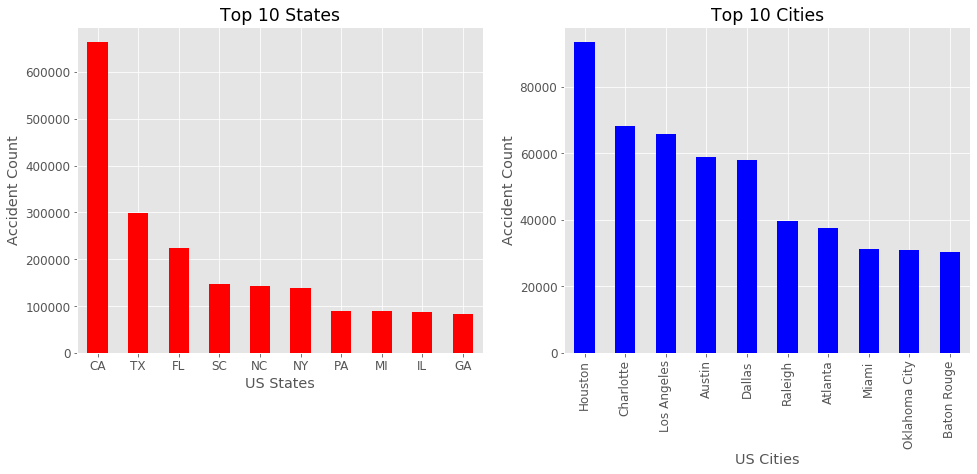

In [16]:
# Top 10 States and cities with highest number of accidents
df_top10_states = df_acc['State'].value_counts().head(10)
df_top10_cities = df_acc['City'].value_counts().head(10)

# Plot 1 : Top 10 States
fig ,ax = plt.subplots(1,2, figsize = (16,6))
df_top10_states.plot(kind = 'bar',title= 'Top 10 States',colormap ='autumn',rot=0, ax = ax[0]);
ax[0].set_xlabel('US States')
ax[0].set_ylabel('Accident Count');

# Plot 2 : Top 10 Cities
df_top10_cities.plot(kind = 'bar',title= 'Top 10 Cities',colormap ='bwr', ax= ax[1]);
ax[1].set_xlabel('US Cities')
ax[1].set_ylabel('Accident Count');

In [17]:
# Count accidents per state and create dataframe for plotting
df_acc_st = pd.DataFrame(df_acc['State'].value_counts())

# Naming index and column
df_acc_st.columns =['Count']
df_acc_st.index.name = 'State'
df_acc_st.head()

,Count
State,
CA,663204
TX,298062
FL,223746
SC,146689
NC,142460


In [18]:
# Plot 3 : Accident Distribution using Choropleth map in Plotly

fig = go.Figure(data=go.Choropleth(
    locations=df_acc_st.index, # State
    z = df_acc_st['Count'], # Data to be color-coded
    locationmode = 'USA-states', 
    colorscale = 'oranges',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accident Count from 2016 -2019',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

In [39]:
# Counting total accidents from 2016-2019 in California and San Francisco
acc_ca = df_acc[df_acc['State'] == 'CA']['State'].value_counts()
acc_sf = df_acc[df_acc['City'] == 'San Francisco']['City'].value_counts()

print(f"There are {acc_ca['CA']} in California and {acc_sf['San Francisco']} accidents in San Francisco over 4 years") 

There are 663204 in California and 8314 accidents in San Francisco over 4 years


### 2. Had accident count increased over the last 4 years?

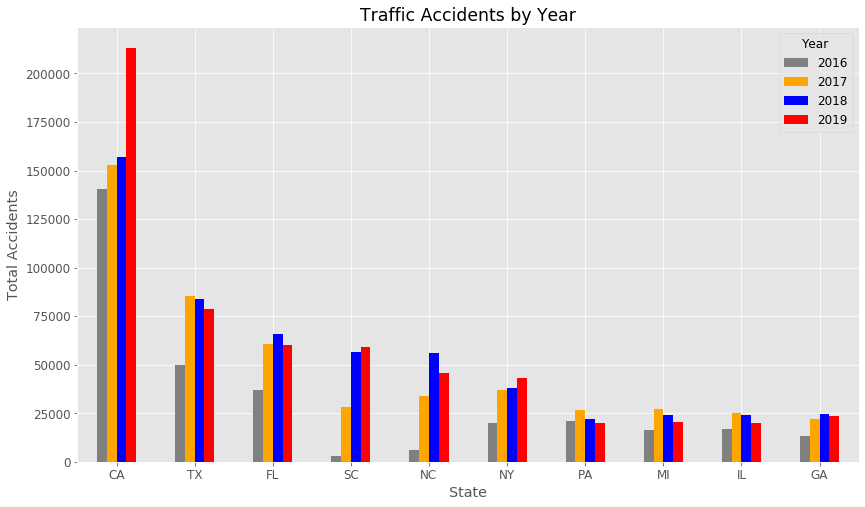

In [49]:
# Create dataframe using pivot table and sort by total accidents over 4 years
df_pivot = df_acc.pivot_table(index='State',columns='Year',values ='Severity',aggfunc='count')

# Create Totals column by summing the count in each year
df_pivot['Totals'] = df_pivot[2016] + df_pivot[2017] + df_pivot[2018] + df_pivot[2019]
df_pivot_year = df_pivot.sort_values(by='Totals',ascending=False)[[2016,2017,2018,2019]].head(10)

# Plot 4 : Traffic Accidents by  Year
color = ['grey','orange','blue','red']
fig,ax=plt.subplots()
df_pivot_year.plot(kind='bar',rot = 0, title = 'Traffic Accidents by Year', figsize = (14,8), ax = ax,color=color)
plt.xlabel('State')
plt.ylabel('Total Accidents');

### 3. How weather impacts accidents across regions?

In [21]:
#Take of copy of original dataframe
df_weather_zone = df_acc.copy()

# Grouping weather conditions 
def fix_weather(value):
    if value in ['Snow','Snow and Thunder','Light Snow / Windy','Snow and Sleet','Light Thunderstorms and Snow','Light Snow Shower', 'Light Snow', 'Heavy Snow','Sleet','Ice', 'Light Ice Pellets','Ice Pellets']:
        weather = 'Snow'
    elif value in ['Rain','Rain Showers','Light Rain Showers','Light Rain Shower','Drizzle','Drizzle and Fog','Light Drizzle','Light Rain','Light Rain / Windy','Light Thunderstorms and Rain','Light Freezing Rain','Light Rain Shower / Windy','Light Rain with Thunder','Light Freezing Drizzle','Rain / Windy']:
        weather = 'Light Rain' 
    elif value in ['Heavy Rain / Windy','Freezing Rain / Windy']:
        weather ='Heavy Rain'
    elif value in ['Wind','Windy','Thunder / Wintry Mix / Windy','Blowing Sand','Cloudy / Windy','Widespread Dust / Windy','Dust Whirls','Thunder / Windy','Haze / Windy','Fair / Windy','Thunder and Hail / Windy']:
        weather = 'Windy'
    elif value in ['Fog','Patches of Fog','Shallow Fog','Light Freezing Fog','Partial Fog / Windy']:
        weather = "Fog"
    elif value in ['Fair','Fair / Windy']:
        weather = 'Fair'
    elif value in ['Thunderstorm','Thunderstorms','Heavy Thunderstorms and Rain','Thunderstorms and Rain','Thunder in the Vicinity','T-Storm','Thunder','Heavy T-Storm']:
        weather = 'Thunderstorm'
    else:
        weather = value
    return weather

# Grouping weather conditions and picking most common weather conditions 
df_weather_zone['Weather_Condition'] = df_weather_zone['Weather_Condition'].apply(fix_weather)

In [22]:
# Get most common weather conditions for traffic accidents
df_acc['Weather_Condition'].apply(fix_weather).value_counts().head(10)

# Function to select common weather conditions
def pick_weather_cond(value):
    list_cond = ['Clear','Mostly Cloudy','Overcast','Fair','Partly Cloudy','Scattered Clouds','Light Rain','Cloudy','Snow','Haze']
    if value in list_cond:
        return value
    else:
        return None
    
# Picking frequent conditions based on count
df_weather_zone['Weather_Condition'] = df_weather_zone['Weather_Condition'].apply(pick_weather_cond)

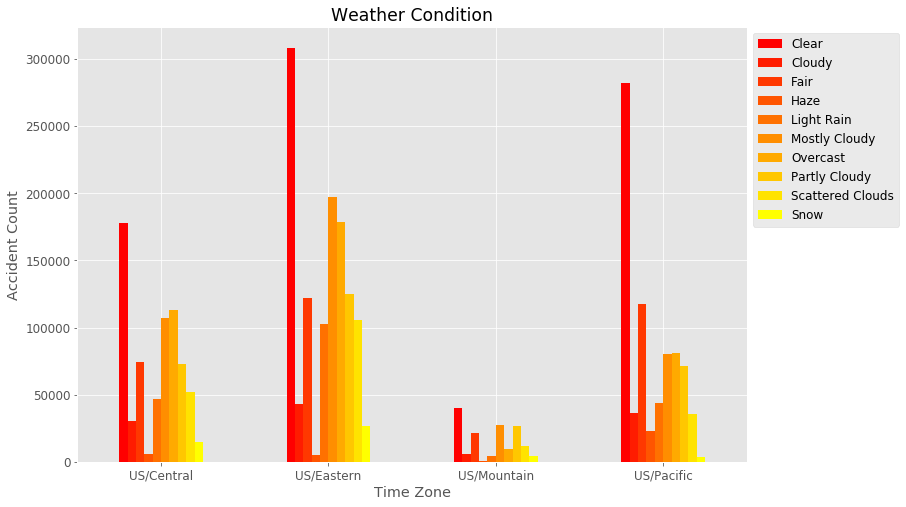

In [50]:
#  Dropping rows for any null values in Timezone(6000+ null values) or WeatherCondition(65000 null values)
# Excluded more than 140000 rows
df_weather_zone = df_weather_zone.dropna(how='any',subset=['Timezone','Weather_Condition'])
df_weather_zone.shape  #(2835160,14)

# Use pivot_table to count accidents by indexing time zone and weather as columns
df_pivot_zone = df_weather_zone.pivot_table(index='Timezone',columns='Weather_Condition',values='Severity',aggfunc='count')

# Plot 5: Distribution based on Time zone and Weather condition
fig,ax = plt.subplots()
df_pivot_zone.plot(kind='bar',title='Weather Condition',cmap='autumn',ax=ax,rot=0);
ax.set_xlabel('Time Zone')
ax.set_ylabel('Accident Count')
ax.legend(bbox_to_anchor=(1,1));

### 4. Monthly, Daily and Hourly Distribution

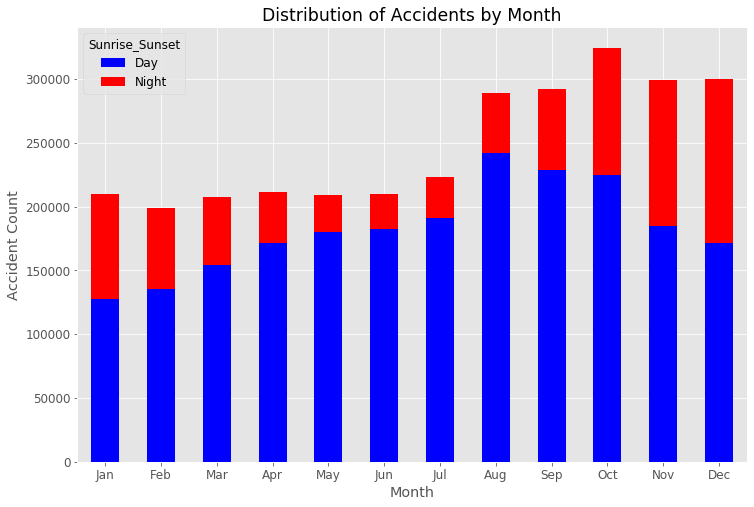

In [24]:
# Use Pivot table to get months in rows and Day/Night count in columns
df_pivot = df_acc.pivot_table(index='Month',columns= 'Sunrise_Sunset',values='Severity',aggfunc ='count')

# Plot 6 : Distribution of Accidents by Month, Weather across Timezones
fig,ax = plt.subplots()
df_pivot.plot(kind='bar',stacked=True,rot=0,title='Distribution of Accidents by Month',cmap='bwr',ax=ax);
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(label)
ax.set_ylabel('Accident Count');

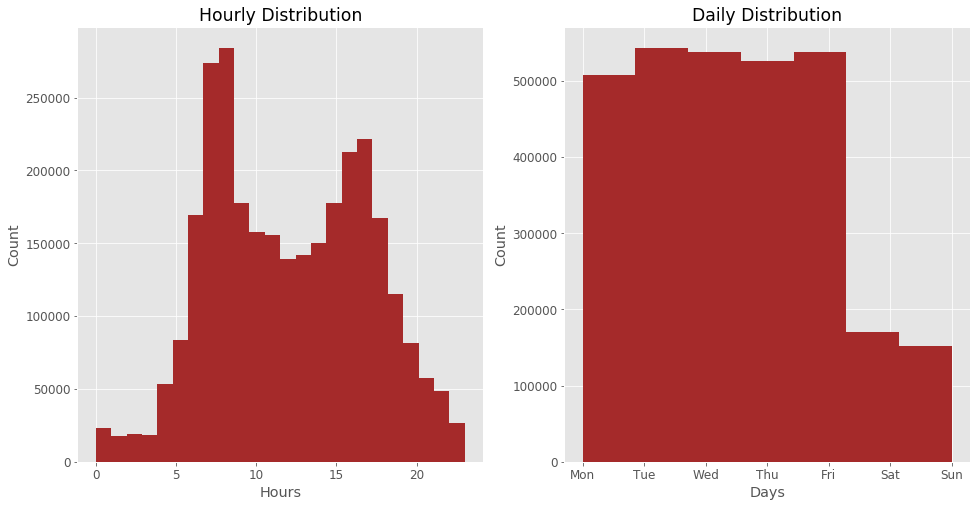

In [25]:
# Plot 7: Histograms by Hour and Day
fig,ax = plt.subplots(1,2,figsize = (16,8))
df_acc['Hour'].hist(bins=24,ax=ax[0],color='brown')
ax[0].set_title('Hourly Distribution')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Count')

df_acc['Day'].hist(bins=7,ax=ax[1],color='brown')
ax[1].set_title('Daily Distribution')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Count');

###  5. How accident severity impacting the traffic delays?

In [26]:
# Count accidents by Severity level
df_sev = pd.DataFrame(df_acc['Severity'].value_counts())
df_sev.index.name = 'Sev_ID'
df_sev.head()

,Severity
Sev_ID,
2,1993407
3,887619
4,92334
1,968


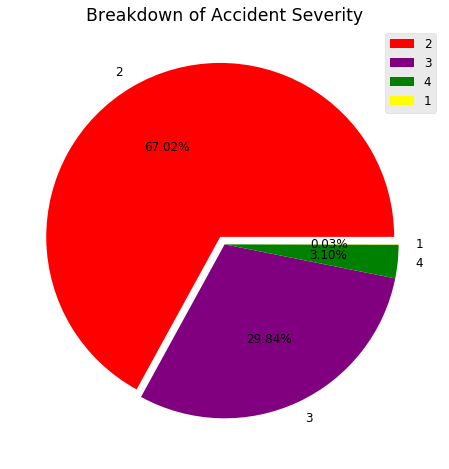

In [27]:
# Plot 8: Accident Severity
labels = df_sev.index
colors = ['red','purple','green','yellow']
fig,ax = plt.subplots(figsize=(14,8))
plt.pie(df_sev['Severity'],labels=df_sev.index,autopct='%0.2f%%',explode = (0.05,0,0,0),colors=colors);
plt.title('Breakdown of Accident Severity');
plt.legend(labels,loc="upper right");

In [28]:
# Calculating the duration of the Accident in minutes
df_acc['Duration(min)'] = df_acc['End_Time'] - df_acc['Start_Time']
df_acc['Duration(min)'] = df_acc['Duration(min)'].astype('timedelta64[m]')

# Calculating absolute value of integers
df_acc['Duration(min)'] = df_acc['Duration(min)'].astype('int64').abs()

# Removing outliers
df_acc['Duration(min)'].describe()
df_acc_duration = df_acc[df_acc['Duration(min)'] < 1000]
df_acc_duration[['Severity','Duration(min)']].head()

,Severity,Duration(min)
ID,,
A-1,3,314
A-2,2,30
A-3,2,30
A-4,3,30
A-5,2,30


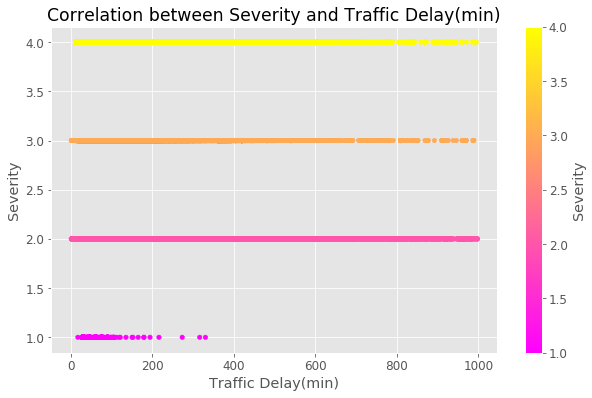

In [29]:
# Plot 9: Correlation between Severity of the accident and amount of time traffic has been disrupted

fig,ax = plt.subplots()
df_acc_duration.plot(kind='scatter',x='Duration(min)',y='Severity',c='Severity',cmap='spring',title ='Correlation between Severity and Traffic Delay(min)', ax=ax,figsize=(10,6));
ax.set_xlabel('Traffic Delay(min)');

### 5. To visualize accident density by creating GeoDataframe using Latitude and Longitude values 

In [30]:
# Pick latitude and Longitude coordinates from data
us_acc_df = df_acc[['State','City','Start_Lng','Start_Lat']]

# Converting coordinates into geometry point
gdf = gpd.GeoDataFrame(us_acc_df, geometry=gpd.points_from_xy(us_acc_df.Start_Lng, us_acc_df.Start_Lat))
gdf.head()

,State,City,Start_Lng,Start_Lat,geometry
ID,,,,,
A-1,OH,Dayton,-84.058723,39.865147,POINT (-84.05872 39.86515)
A-2,OH,Reynoldsburg,-82.831184,39.928059,POINT (-82.83118 39.92806)
A-3,OH,Williamsburg,-84.032608,39.063148,POINT (-84.03261 39.06315)
A-4,OH,Dayton,-84.205582,39.747753,POINT (-84.20558 39.74775)
A-5,OH,Dayton,-84.188354,39.627781,POINT (-84.18835 39.62778)


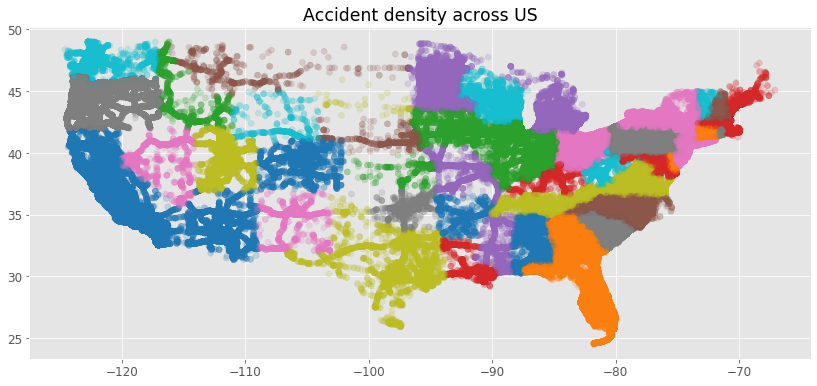

In [31]:
# Plotting geodataframe

# Plot 10: Accident density
fig,ax=plt.subplots(figsize=(14,12))
gdf.plot(column='State',ax=ax,legend=False,alpha=0.2)
plt.title('Accident density across US');

In [32]:
# Get CA accidents coordinates
gdf_ca_acc = gdf[gdf['State'] == 'CA']
gdf_ca_acc.head()

,State,City,Start_Lng,Start_Lat,geometry
ID,,,,,
A-729,CA,Vallejo,-122.233017,38.085300,POINT (-122.23302 38.08530)
A-730,CA,Hayward,-122.084167,37.631813,POINT (-122.08417 37.63181)
A-731,CA,Walnut Creek,-122.070717,37.896564,POINT (-122.07072 37.89656)
A-732,CA,Cupertino,-122.032471,37.334255,POINT (-122.03247 37.33425)
A-733,CA,San Jose,-121.910713,37.250729,POINT (-121.91071 37.25073)


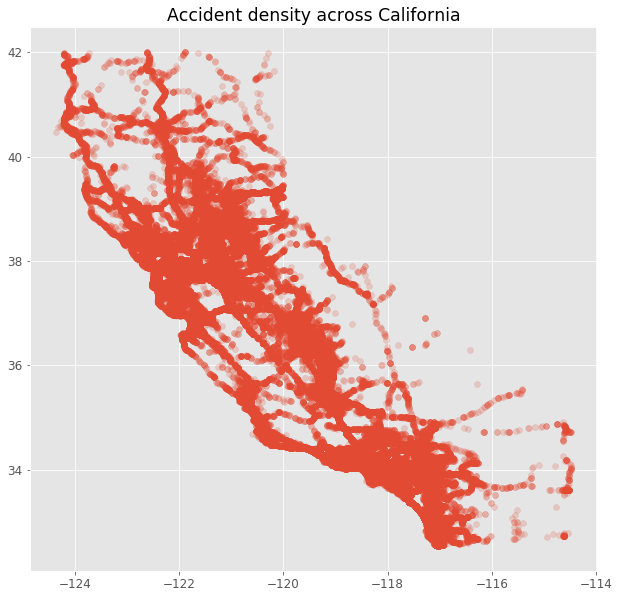

In [33]:
# Plot 11: Accidents across California
fig,ax=plt.subplots(figsize=(14,10))
gdf_ca_acc.plot(ax=ax,legend=False, alpha=0.2)
plt.title('Accident density across California');

## Conclusion

* California and Houston tops the list in Traffic Accidents
* Over the last 4 years, acidents have increased in CA, NY, SC and there is a decrease in TX,FL,MI,IL states 
* Density of accidents seems to be more on Eastern than Central and Western side of the country
* Most accidents happened during the day around 7-9am on weekedays around the country
* Accidents occurred on a clear day rather than cloudy or rainy day